<a href="https://colab.research.google.com/github/boriskuchin/MADMO-BASE-2024/blob/main/02extra_scopes_closures_decorators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Пространства имен

Как вы помните, оператор присваивания при объявлении переменной не создает его копию, а просто создает связь между объектом в оперативной памяти и удобным для нас именем. Без имени крайне тяжело обращаться к желаемой переменной.

Например, выражение:

```python
x = 'Hello World!'
```

создает связь между именем переменной `x` и значением в памяти `'Hello World!'`.

**Пространство имен** - набор определенных на данный момент имен объектов (переменных) вместе с информацией на какую область в памяти они ссылаются.

Можно воспринимать пространство имен как большой словарь, в котором ключами являются имена переменных, а значениями - области памяти. Каждая пара "ключ-значение" соответствует какой-либо переменной.

В программе любой сложности создаются сотни и тысячи имен, каждое из которых ссылается на свою область памяти. И Python необходимо отслеживать все эти имена и следить, чтобы они не мешали друг другу.

Пространства имен - не просто важный компонент Python, вспомним, что говорит "The Zen of Python" на этот счет:

In [ ]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


В Python выделяют 4 типа пространств имен::

- **Встроенные (Built-In)**
- **Глобальные (Global)**
- **Оборачивающие (Enclosing)**
- **Локальные (Local)**

Они обладают разной продолжительностью жизни. В процессе выполнения программы Python создает новые пространства имен, когда это необходимо, и удаляет их, когда нужна в них пропадает. В один момент времени обычно существует несколько пространств имен.

Рассмотрим эти типы пространств имен:

## Встроенное пространство (Build-in)

Встроенное пространство имен содержит именя всех встроенных объектов в Python. Они доступны все время, пока программа работает. Можем получить список всех объектов из встроенного пространства имен с помощью команды `dir(__builtins__)`.

In [ ]:
print(*dir(__builtins__), sep=', ')

ArithmeticError, AssertionError, AttributeError, BaseException, BlockingIOError, BrokenPipeError, BufferError, BytesWarning, ChildProcessError, ConnectionAbortedError, ConnectionError, ConnectionRefusedError, ConnectionResetError, DeprecationWarning, EOFError, Ellipsis, EnvironmentError, Exception, False, FileExistsError, FileNotFoundError, FloatingPointError, FutureWarning, GeneratorExit, IOError, ImportError, ImportWarning, IndentationError, IndexError, InterruptedError, IsADirectoryError, KeyError, KeyboardInterrupt, LookupError, MemoryError, ModuleNotFoundError, NameError, None, NotADirectoryError, NotImplemented, NotImplementedError, OSError, OverflowError, PendingDeprecationWarning, PermissionError, ProcessLookupError, RecursionError, ReferenceError, ResourceWarning, RuntimeError, RuntimeWarning, StopAsyncIteration, StopIteration, SyntaxError, SyntaxWarning, SystemError, SystemExit, TabError, TimeoutError, True, TypeError, UnboundLocalError, UnicodeDecodeError, UnicodeEncodeError

Подробнее с функцией `dir` мы познакомимся на следующем занятии.

В этом выводе можем увидеть множество уже знакомых нам функций.

Встроенное пространство имен создается при запуске интерпретатора и уничтожается лишь при завершении его работы.

## Глобальное пространство (Global)

Глобальное пространство имен содержит все имена, определенные на уровне основной программы. Python создает его, когда основное тело программы запускается и остается до завершения работы интерпретатора.

Строго говоря, может существовать не одно, а несколько глобальных пространств имен. Интерпретатор дополнительно создает по глобальному пространству имен для каждого модуля, который программа загружает с помощью `import`. Подробнее про модули мы поговорим на другом занятии.

Создадим несколько переменных и посмотрим на глобальное пространство имен:

In [ ]:
variable_a, variable_b, variable_c = 10, 20, 30

In [ ]:
print(*dir(), sep=', ')

In, Out, _, __, ___, __builtin__, __builtins__, __doc__, __loader__, __name__, __package__, __spec__, _dh, _i, _i1, _i2, _i3, _ih, _ii, _iii, _oh, exit, get_ipython, quit, variable_a, variable_b, variable_c


## Локальное и оборачивающее пространства

Пространства имен могут создаваться не только при запуске основной программы, но и ее компонентами, например, *функциями* - отдельное пространство имен создается при **каждом вызове функции**.

**Локальное пространство имен (local)** - пространство имен, которое содержит локальные имена внутри функции. Это пространство имен создается при вызове функции и продолжается до тех пор, пока функция не вернет какое-либо значение (в том числе `None`).



Проверим это с помощью следующего примера:

In [ ]:
variable = 2000

In [ ]:
id(variable)

140224540367280

In [ ]:
def some_func(x):
    i = 1
    variable = 10000
    print(*dir(), sep=', ')
    print("variable =", variable, id(variable))

In [ ]:
some_func(0)

i, variable, x
variable = 10000 140224540366992


In [ ]:
variable

2000

In [ ]:
id(variable)

139856913989168

Как видим, в пространстве имен, возникшем при запуске функции `some_func`, существуют как аргументы этой функции, так и переменные, определенные внутри нее.

Эти переменные не видны в глобальном пространстве имен.

In [ ]:
print(*dir(), sep=', ')

In, Out, _, _5, _8, __, ___, __builtin__, __builtins__, __doc__, __loader__, __name__, __package__, __spec__, _dh, _i, _i1, _i2, _i3, _i4, _i5, _i6, _i7, _i8, _i9, _ih, _ii, _iii, _oh, exit, get_ipython, quit, some_func, variable, variable_a, variable_b, variable_c


При этом важно помнить, что **циклы и условные операторы не создают свои пространства имен!**

In [ ]:
for loop_counter in range(10):
    value_assigned_in_for = 2

In [ ]:
loop_counter

9

In [ ]:
value_assigned_in_for

2

In [ ]:
if True:
    value_assigned_in_if = 1

In [ ]:
value_assigned_in_if

1

Если мы находимся не в какой-либо функции, а в основной программе, то локальным пространством для нас будет глобальное пространство. Убедимся в этом:

In [ ]:
locals() is globals()

True

Но функции не существуют в вакууме, они сами где-то должны быть определены и вызваны.

**Оборачивающее пространство имен** (для какого-либо локального пространства / функции) - пространство имен, в коротом определена функция, создающая конкретное пространство имен.

В нашем примере функция `some_func` определена в глобальном пространстве имен, поэтому общая картина выглядит следующим образом:

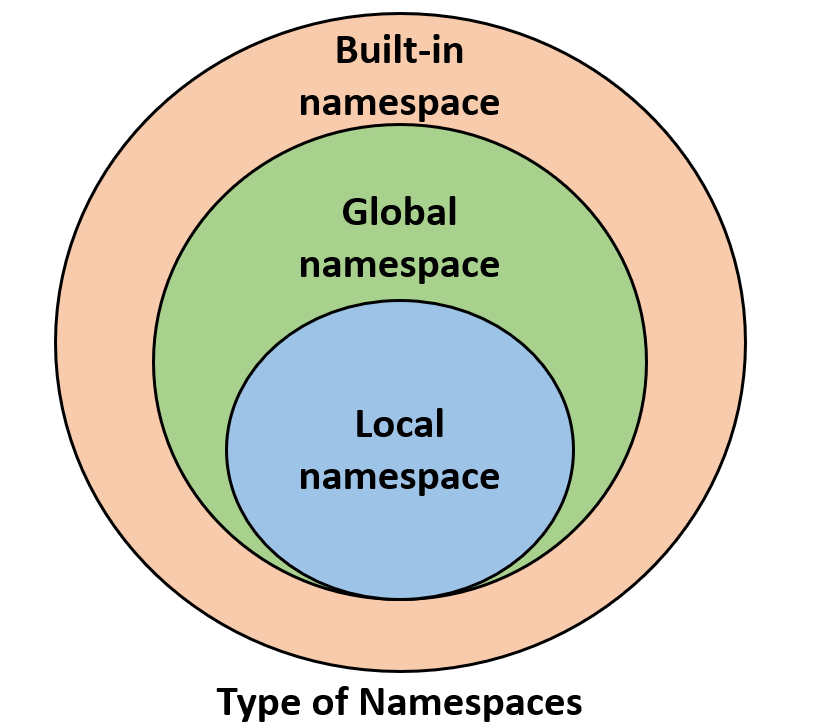

Казалось бы, зачем вводить дополнительное определение оборачивающего пространства имен, когда функции и так всегда создаются в глобальном пространстве имен?

В этом выражении находится ошибка - мы можем объявлять функции не только в глобальном пространстве имен (в нашей основной программе), но и в других функциях.

Пример такой вложенной функции:

In [ ]:
def foo():
    print('Start foo()')

    def bar():
        print('Start bar()')
        print('End bar()')
        return

    bar()

    print('End bar()')
    return

In [ ]:
foo()

В таком случае оборачивающим пространством имен для функции `foo` будет пространство имен `bar`, а не глобальное.

# Чем могут быть полезны вложенные функции?

Вложенные функции могут быть полезны в следующим случаях:
1. **Предоставление инкапсуляции.** Часто необходимо защитить или скрыть функцию от происходящего снаружи (в глобальной области видимости).
2. **Созданий внутренних функций-помощников.** Часто внутри функции приходится переиспользовать один и тот же код несколько раз, при этом этот код нигде больше не используется, кроме как в этой функции.
3. **Создание замыканий-фабрик функций**, которые сохраняю состояние между вызовами.
4. **Создание декораторов** для изменения поведения функции без непосредственного изменения ее кода.

# Область видимости (scope)

Наличие нескольких пространств имен означает, что могут существовать несколько переменных с одинаковым именем, которые находятся в разных пространствах имен и ссылаются на разные области памяти.

Возникает вопрос - как Python понимает к какой именно переменной мы обращаемся, когда используем ее имя?

Здесь нам на помощь приходят области видимости (scope). Область видимости имени - регион программы, в котором это имя доступно. Интерпретатор определяет области видимости при запуске кода, основываясь на том, где именно имя было объявлено и откуда к ней обращаются.

### The rabbit hole goes deeper...

Если точнее, то:

>Python понимает откуда брать значение необходимой переменной при компиляции, а непосредственно берет это значение лишь при запуске.

**Что? Да!** Python использует компиляцию текста кода в байт-код, чтобы лишь затем интепретировать его строка за строкой, оставаясь при этом интерпретируемым языком.

## Правило LEGB

Если в программе происходит обращение к имени `x`, Python пытается найти это имя в нескольких пространствах имен в следующем порядке:
- **Local:** если обращение к переменной `x` происходит внутри функции, то интерпретатор сначала ищет ее в самом внутреннем пространстве имен  - локальном для этой функции.
- **Enclosing:** если `x` не найдена в локальном пространстве имен и функция, в которой обращаются к `x` объявлена в другой функции, то интерпретатор ищет в оборачивающем пространстве имен.
- **Global:** если `x` все еще не удается найти, то интерпретатор ищет ее в глобальном пространстве имен.
- **Built-in:** в последнюю очередь интерпретатор ищет переменную `x` во встроенном пространстве имен.

Такой порядок поиска переменной называется **правилом LEGB**.

**Что происходит, если и во встроенном пространстве имен переменной нет?** Интерпретатор выдает ошибку `NameError`.

Рассмотрим это правило на примерах:

## Примеры LEGB

### Пример 1. Очевидное

Простой пример с глобальной переменной:

In [ ]:
x = "global x"

def level_one():
    print(x)

level_one()

global x


Тут все очевидно, Python использует глобальную переменную. Это вы наверняка знали и без сегодняшнего занятия.

### Пример 2. Условно локальное

Добавим присвоение, но при условии:

In [ ]:
x = "global x"

def level_two(v):
    if v:
        x = "local x"
    print(x)

In [ ]:
level_two(True)

In [ ]:
level_two(False)

При компиляции Python видит, что внутри функции `level_two` создается локальная переменная `x`, при этом на этапе компиляции значение `v` неизвестно. Поэтому любое обращение к `x` внутри `level_two` трактуется как обращение к локальной переменной `x`.

### Пример 3. Нелокальная `z`

In [ ]:
x = "global x"

def level_three():
    z = "outer z"

    def inner(y):
        return x, y, z

    print(inner("y arg"))

In [ ]:
level_three()

- `x` отсутствует в локальном пространстве, в оборачивающем пространстве, но есть в глобальном - используем его
- `y` есть в локальном пространстве как аргумент - используем его
- `z` отсутствует в локальном пространстве, но есть в оборачивающем пространстве - используем его

Эта же логика работает, если определим функцию `inner` до переменной `z`:

In [ ]:
x = "global x"

def level_three():
    def inner(y):
        return x, y, z

    z = "outer z"

    print(inner("y arg"))

In [ ]:
level_three()

На момент запуска `inner` все переменные имеют значения, проблем не возникает.

# Словари пространств имен

Ранее мы говорили, что пространства имен можно воспринимать как словари, в которых ключом является имя переменной, а значением - значение переменной.

На самом деле для глобальных и локальных пространств имен это абсолютно верно! Python действительно хранит эти пространства имен в виде словарей.

## Функция `globals`

Встроенная функция `globals()` возвращает ссылку на словарь, содержащий текущее глобальное пространство имен. Его можно использовать для доступа к элементам глобального пространства имен.

Рассмотрим это на примере:

In [ ]:
type(globals())

dict

In [ ]:
globals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  "print(*dir(__builtins__), sep=', ')",
  'variable_a, variable_b, variable_c = 10, 20, 30',
  "print(*dir(), sep=', ')",
  'variable = 2000',
  'id(variable)',
  'def some_func(x):\n    i = 1\n    variable = 10000\n    print(*dir(), sep=\', \')\n    print("variable =", variable, id(variable))',
  'some_func(0)',
  'variable',
  "print(*dir(), sep=', ')",
  'for loop_counter in range(1):\n    value_assigned_in_for = 2',
  'loop_counter',
  'for loop_counter in range(10):\n    value_assigned_in_for = 2',
  'loop_counter',
  'value_assigned_in_for',
  'if True:\n    value_assigned_in_if = 1',
  'value_assigned_in_if',
  'locals() is globals()',
  "def f():\n    print('Start f()')\n\n    def g():\n        print('Sta

Как видим, интерпретатор уже поместил некоторые переменные в глобальное пространство имен. В зависимости от версии Python, операционной системы и другого ПО, эти переменные могут слегка отличаться.



Теперь посмотрим как поменяется словарь при объявлении новой переменной:

In [ ]:
x = 'foo'

In [ ]:
globals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  "print(*dir(__builtins__), sep=', ')",
  'variable_a, variable_b, variable_c = 10, 20, 30',
  "print(*dir(), sep=', ')",
  'variable = 2000',
  'id(variable)',
  'def some_func(x):\n    i = 1\n    variable = 10000\n    print(*dir(), sep=\', \')\n    print("variable =", variable, id(variable))',
  'some_func(0)',
  'variable',
  "print(*dir(), sep=', ')",
  'for loop_counter in range(1):\n    value_assigned_in_for = 2',
  'loop_counter',
  'for loop_counter in range(10):\n    value_assigned_in_for = 2',
  'loop_counter',
  'value_assigned_in_for',
  'if True:\n    value_assigned_in_if = 1',
  'value_assigned_in_if',
  'locals() is globals()',
  "def f():\n    print('Start f()')\n\n    def g():\n        print('Sta

Как видим, после присвоения переменной `x = 'foo'`, новый элемент появился в словаре глобального пространства имен.

Обычно мы получаем доступ к данным, хранящимся в переменной, через имя этой переменной. Но кроме того мы можем менять и добавлять переменные не напрямую, а через словарь глобального пространства имен:

In [ ]:
x

'foo'

In [ ]:
globals()['x']

'foo'

In [ ]:
x is globals()['x']

True

Попробуем добавить новую переменную:

In [ ]:
globals()['y'] = 100

In [ ]:
globals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  "print(*dir(__builtins__), sep=', ')",
  'variable_a, variable_b, variable_c = 10, 20, 30',
  "print(*dir(), sep=', ')",
  'variable = 2000',
  'id(variable)',
  'def some_func(x):\n    i = 1\n    variable = 10000\n    print(*dir(), sep=\', \')\n    print("variable =", variable, id(variable))',
  'some_func(0)',
  'variable',
  "print(*dir(), sep=', ')",
  'for loop_counter in range(1):\n    value_assigned_in_for = 2',
  'loop_counter',
  'for loop_counter in range(10):\n    value_assigned_in_for = 2',
  'loop_counter',
  'value_assigned_in_for',
  'if True:\n    value_assigned_in_if = 1',
  'value_assigned_in_if',
  'locals() is globals()',
  "def f():\n    print('Start f()')\n\n    def g():\n        print('Sta

In [ ]:
y

100

In [ ]:
globals()['y'] = 3.14159

In [ ]:
y

3.14159

In [ ]:
globals()[(1,2,3)] = 3.14159

In [ ]:
globals()[(1,2,3)]

3.14159

In [ ]:
(1,2,3)

(1, 2, 3)

## Функция `locals`

Аналогичный механизм есть и для локального пространства имен - с помощью функции `locals`.

In [ ]:
def f(x, y):
    s = 'foo'
    print(locals())

In [ ]:
f(10, 0.5)

{'x': 10, 'y': 0.5, 's': 'foo'}


Будучи вызванной внутри функции `f()`, `locals()` возвращает словарь, представляющий словарь локального пространства имен для этой функции.
Заметим, что кроме локально определенных переменных в нем так же присутствуют аргументы функции `x` и `y`, поскольку они тоже являются локальными для функции `f()`.

Если мы вызовем `locals()` вне функции, в основной программе, то получим такой же выход, как в `globals()`.

In [ ]:
globals() is locals()

True

# Специализированные ключевые слова

## Ключевое слово `global`

Иногда бывают ситуации, когда необходимо поменять переменную из глобальной области видимости. В Python это возможно с помощью `global`:

In [ ]:
x = 20
y = 10

def f():
    global x, y
    x = 40
    print(x, y)

In [ ]:
x

20

In [ ]:
f()

40 10


In [ ]:
x

40

Выражение `global x` показывает, что пока функция `f()` выполняется, все ссылки на переменную `x` будут относиться к `x` в глобальном пространстве имен.

То есть операция присвоения `x = 40` не создают новую переменную, а меняет переменную `x` в глобальной области видимости:

Аналогичные результаты мы могли бы получить с использованием функции `globals()`:

In [ ]:
x = 20

def f():
    globals()['x'] = 40
    print(x)

In [ ]:
x

20

In [ ]:
f()

40


In [ ]:
x

40

Принципиальной разницы этих двух подходов нет, разве что ключевое слово `global` делает код чище.

Если указанного имени нет в глобальном пространстве имен, то комбинация операции присвоения и ключевого слова `global` создадут ее:

In [ ]:
del z

NameError: ignored

In [ ]:
def g():
    global z
    z = 20

In [ ]:
g()
z

20

## Ключевое слово `nonlocal`

Похожая ситуация существует и для вложенных функций. Ключевое слово `global` позволяет функции получить доступ и модифицировать объект в глобальной области видимости. Что если в обернутой функции необходимо изменить переменную в оборачивающей? Рассмотрим пример:

In [ ]:
def f():
    x = 20

    def g():
        x = 40

    g()
    print(x)

In [ ]:
f()

20


В этом случае первое определение x находится в оборачивающем пространстве, а не в глобальном. Функция `g()` не может напрямую изменять значения как в глобальной, так и в оборачивающей областях видимости.

`global` здесь тоже не поможет:

In [ ]:
del x

In [ ]:
def f():
    x = 20

    def g():
        global x
        x = 40

    g()
    print(x)

In [ ]:
f()

20


In [ ]:
x

40

Поэтому в таких ситуациях используют ключевое слово `nonlocal` - интерпретатор будет искать переменную в ближайшем оборачивающем пространстве имен:

In [ ]:
def f():
    x = 20

    def g():
        nonlocal x
        x = 40

    g()
    print(x)

In [ ]:
f()

40


---

# Статичность пространства имён в Python

Пространства имен в Python являются статическими, т.е. Python анализирует код и создает нужные области видимости перед его выполнения. Рассмотрим пример:

In [ ]:
x = 1

def f():
    print(x)

    def g():
        print(x)

    g()
    x = 2

f()

UnboundLocalError: ignored

Т.к. в функции `f` имеется операция присвоения для переменной `x`, то Python понимает, что мы здесь хотим использовать локальную переменную, поэтому при попытке в этой же функции (пусть и ранее) вызвать `print(x)` мы получаем ошибку.

Аналогичная ошибка будет, если мы закомментируем `print(x)`:

In [ ]:
x = 1

def f():
    #print(x)

    def g():
        print(x)

    g()
    x = 2

f()

NameError: ignored

Python понял, что в функции `f` будет создана локальная переменная `x`, поэтому при попытке напечатать ее значении во вложенной функции `g` Python пытается напечатать переменную из enclosing для функции `g` области видимости, а в ней эта переменная еще не определена, но будет определена.

# Замыкания (Closures)

>In computer programming languages, a closure is a function together with a referencing environment of that function. A closure function is any function that uses a variable that is defined in an environment (or scope) that is external to that function, and is accessible within the function when invoked from a scope in which that free variable is not defined.

**Замыкание** (closure) — функция, в теле которой присутствуют ссылки на переменные, объявленные вне тела этой функции в окружающем коде и не являющиеся ее параметрами.

Существования замыканий следует из правила LEGB, возможности оперировать с функциями как обьектами и того что области видимости в Питоне - статические.

В примерах на правило LEGB мы всегда выводили значение внутри функции, давайте исправим это:

In [ ]:
x = "global x"

def level_four():
    z = "first outer z"

    def inner(y):
        return x, y, z

    z = "second outer z"
    return inner

In [ ]:
returned_inner = level_four()

In [ ]:
returned_inner("y arg")

('global x', 'y arg', 'second outer z')

Получили интересное явление - вроде как пространство имен, которое создалось при вызове функции `level_four` должно было исчезнуть (функция отработала), но мы все еще можем получить значение переменной `z`.

`z` является частью замыкания для функции inner, и раз мы еще используем ее (имеется ссылка на этот объект в памяти), то нам нужны и все переменные, которые эта функция использует для работы.

Поэтому сборщик мусора не удалил переменную `z` и мы все еще можем использовать ее, но не напрямую.

Как узнать что лежит в замыкании нашей функции?

In [ ]:
returned_inner.__closure__

(<cell at 0x7c5d3796cbb0: str object at 0x7c5d3783e870>,)

Это и есть наша переменная `z`. Проверим это:

In [ ]:
returned_inner.__closure__[0].cell_contents

'second outer z'

Кроме того, заметим, что в замыкании нет переменной `x`, т.к. она глобальная.

Рассмотрим более сложный пример:

In [ ]:
x = "global x"

def level_five(n):
    z = f"outer z {n}"

    def inner(y):
        return x, y, z

    return inner

In [ ]:
f = level_five(0)
g = level_five(1)

print(f("y arg"), g("another y arg"))

('global x', 'y arg', 'outer z 0') ('global x', 'another y arg', 'outer z 1')


Видим, что функции `f` и `g` используют разные переменные `z` для своей работы.

Почему так?

Несмотря на то, что функции превращаются в байт-код при компиляции, сами объекты функций создаются лишь при запуске. `def` создает новую функцию, прикрепляя ее имя к ранее созданному байт-коду.

Поэтому каждый вызов функции `level_five` создает свое замыкание со своими `z` и `inner`.

Вовзращать можно и не одну функцию:

In [ ]:
def make_adder(x):
    def adder(y):
        return x + y
    return adder

In [ ]:
add_two = make_adder(2)
add_two(5)

7
9


In [ ]:
def make_adder(x):
    def adder(y):
        return x + y
    def adder1(z):
        return x + z * 2
    return adder, adder1

In [ ]:
adder_global, adder1_global = make_adder(42)

In [ ]:
adder_global(1)

43

In [ ]:
adder1_global(1)

44

При этом функции могут замыкать одинаковые переменные:

In [ ]:
value1 = 0

def cell1(value=0):
    def Get():  # функции принято называть как и переменные - с маленькой буквы, здесь игнорируем чтобы лучше различать внутренние и внешние функции
        return value

    def Set(new_value):
        nonlocal value
        value = new_value

    return Get, Set

In [ ]:
Get, Set = cell1(10)
print(Get())

10


In [ ]:
Set(20)
print(Get())

20


In [ ]:
value

NameError: ignored

## Лямбда-функции

А как работают замыкания с лямбда функциями?

Хотим создать список функций, которые домножают аргумент-число на множитель:

In [ ]:
multipliers = []

for m in range(5):
    multipliers.append(lambda x: x * m)

In [ ]:
print('m =', m)

m = 4


In [ ]:
[multipliers[i](5) for i in range(5)]

[20, 20, 20, 20, 20]

In [ ]:
multipliers[0]

<function __main__.<lambda>(x)>

In [ ]:
multipliers[0](5)

20

Почему получаем `[20, 20, 20, 20, 20]`, а не `[0, 5, 10, 15, 20]`?

В наших лямбда-функциях нет объявления переменной `m`, поэтому интерпретатор ищет (и находит) переменную в глобальной области видимости. Поэтому при вызове наших анонимных функций будет использоваться глобальная переменная `m`, которая может поменяться между созданием функции и вызова функции. В итоге все наши лямбда-функции ссылаются на одно и ту же переменную `m` - глобальную переменную.

Поэтому если мы поменяем переменную `m`, то поменяется и поведение наших функций:

In [ ]:
m = 0

print([multipliers[i](5) for i in range(5)])

[0, 0, 0, 0, 0]


In [ ]:
multipliers[0]

<function __main__.<lambda>(x)>

По сути, это эквивалентно следующему примеру:

In [ ]:
def fn1(x):
    return m * x

def fn2(x):
    return m * x

def fn3(x):
    return m * x

multipliers = [fn1, fn2, fn3]

m = 5

print([multipliers[i](5) for i in range(3)])

[25, 25, 25]


In [ ]:
multipliers[0]

<function __main__.fn1(x)>

# Декораторы

В качестве аргумента для внешней функции можем передать не только числа, но и функцию!

Поэтому замыкания можно использовать для быстрого изменения поведения функции.

In [ ]:
def deprecate(func):
    def inner(*args, **kwargs):
        print('WARNING: ' + func.__name__ +' is deprecated')
        return func(*args, **kwargs)
    return inner

pprint = deprecate(print)

pprint([1, 2, 3], '123', sep='\n')

[1, 2, 3]
123


In [ ]:
mmax = deprecate(max)
mmax(3,4,5)

5

Теперь перед выполнением функции получаем сообщение. Аналогично можем менять поведение и наших функций:

In [ ]:
def own_max(a, b):
    'This is a really nice looking docstring'
    return a if a > b else b

In [ ]:
own_max(3, 4)

4

In [ ]:
new_own_max = deprecate(own_max)
new_own_max(3, 4)

4

In [ ]:
deprecate(own_max)

<function __main__.deprecate.<locals>.inner(*args, **kwargs)>

Каждый раз переопределять функцию через присвоение неудобно, поэтому Python поддерживает более удобный механизм - декорирование:

In [ ]:
def deprecated(func):
    def wrapper(*args, **kwargs):  # Теперь внутренняя функция называется не inner, а wrapper (обертка)
        print('WARNING: ' + func.__name__ +' is deprecated')
        return func(*args, **kwargs)
    return wrapper

def congrats(func):
    def wrapper(*args, **kwargs):  # Теперь внутренняя функция называется не inner, а wrapper (обертка)
        print('Congratulations: ' + func.__name__ +' is awesome function')
        return func(*args, **kwargs)
    return wrapper


@congrats
@deprecated
def own_max(a, b):
    'This is a really nice looking docstring'
    return a if a > b else b

own_max(1, 2)

Congratulations: wrapper is awesome function


2

In [ ]:
own_max(3,2)

Congratulations: wrapper is awesome function


3

In [ ]:
help(own_max)

Help on function wrapper in module __main__:

wrapper(*args, **kwargs)



In [ ]:
new_own_max = congrats(deprecate(own_max))

In [ ]:
new_own_max(1, 2)

Congratulations: inner is awesome function


2

Но у такого подхода есть проблема:

In [ ]:
print(own_max.__name__)
print(own_max.__doc__)

wrapper
None


**Решение 1** - явно переписать атрибуты функции `wrapper`:

In [ ]:
def deprecated(func):
    def wrapper(*args, **kwargs):
        print('WARNING: ' + func.__name__ +' is deprecated')
        return func(*args, **kwargs)
    wrapper.__name__ = func.__name__
    wrapper.__doc__ = func.__doc__
    wrapper.__module__ = func.__module__
    # Может переписать и другие необходимые атрибуты
    return wrapper

@deprecated
def own_max(a, b):
    'This is a really nice looking docstring'
    return a if a > b else b

own_max(1, 2)

2

In [ ]:
print(own_max.__name__)
print(own_max.__doc__)

own_max
This is a really nice looking docstring


**Решение 2** - использовать декоратор из модуля `functools`:

In [ ]:
import functools

def deprecated(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        print('WARNING: ' + func.__name__ +' is deprecated')
        return func(*args, **kwargs)
    return wrapper

@deprecated
def own_max(a, b):
    'This is a really nice looking docstring'
    return a if a > b else b

@deprecated
def own_min(a, b):
    'This is a really nice looking docstring also'
    return a if a < b else b

print(own_max(1, 2))
print(own_min(1, 2))

print(own_max.__name__)
print(own_max.__doc__)

2
1
own_max
This is a really nice looking docstring


In [ ]:
help(functools.wraps)

Help on function wraps in module functools:

wraps(wrapped, assigned=('__module__', '__name__', '__qualname__', '__doc__', '__annotations__'), updated=('__dict__',))
    Decorator factory to apply update_wrapper() to a wrapper function
    
    Returns a decorator that invokes update_wrapper() with the decorated
    function as the wrapper argument and the arguments to wraps() as the
    remaining arguments. Default arguments are as for update_wrapper().
    This is a convenience function to simplify applying partial() to
    update_wrapper().



In [ ]:
print(own_min.__name__)
print(own_min.__doc__)

own_min
This is a really nice looking docstring also


Можем использовать декораторы и с аргументами:

In [ ]:
import sys

def trace(dest=sys.stderr):
    def wraps(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            print(func.__name__ , 'called with args', args, 'kwargs', kwargs, file = dest)
            return func(*args, **kwargs)
        return wrapper
    return wraps

@trace(sys.stderr)
def f(x, test):
    if test > 1:
        return f(x, test / 2)

f('Hi!', test=42)

f called with args ('Hi!',) kwargs {'test': 42}
f called with args ('Hi!', 21.0) kwargs {}
f called with args ('Hi!', 10.5) kwargs {}
f called with args ('Hi!', 5.25) kwargs {}
f called with args ('Hi!', 2.625) kwargs {}
f called with args ('Hi!', 1.3125) kwargs {}
f called with args ('Hi!', 0.65625) kwargs {}


**Минизадача**

Написать декоратор **once(function)**.<br>
Декоратор позволяет вызвать функцию только один раз.

In [ ]:
import functools

def once(func):
    def wrapper(*args, **kwargs):
        pass

    return wrapper

In [ ]:
@once
def foo(x):
    print('Hi!', x)

In [ ]:
foo(5)

Hi! 5


In [ ]:
foo(4)

Hi! 4


In [ ]:
foo(42)

In [ ]:
foo(-1)

Декораторам необязательно быть функциями - забегаем немного наперед:

In [ ]:
from collections import Counter

class Register(object):
    def __init__(self):
        self.stat = Counter()

    def __call__(self, func):
        nm = func.__name__
        def wrapper(*args, **kwrags):
            self.stat[nm] += 1
            return func(*args, **kwrags)
        return wrapper

    def __str__(self):
        result = 'fname\tcallcount\n'
        for name, count in self.stat.items():
            result += '{}:\t{}\n'.format(name, count)
        return result

register = Register()

In [ ]:
@register
def f(x):
    return x

@register
def q(x):
    return q

In [ ]:
f(1)

1

In [ ]:
q(2)
q(4)
q(2)

<function __main__.Register.__call__.<locals>.wrapper(*args, **kwrags)>

In [ ]:
f(5)

5

In [ ]:
print(register)

fname	callcount
f:	2
q:	3



In [ ]:
register(f)

<function __main__.Register.__call__.<locals>.wrapper>